# Predecting Used Car Price with Linear Regression

This notebook consists of the code behind building a linear regression model to predict used car price.

# 1. Web Scraping

We applied Web Scraping by pythin oackages such as BeautifulSoup and Selenium to get used car data from different websites

In [1]:
from bs4 import BeautifulSoup
import requests
import time, os
import pandas as pd
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.action_chains import ActionChains
from selenium.common.exceptions import NoSuchElementException
from selenium.common.exceptions import StaleElementReferenceException
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions
import numpy as np
import warnings
warnings.filterwarnings("ignore")
df1=pd.DataFrame()
lst_dict = []

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

chromedriver = "C:/Users/hp/Desktop/chromedriver.exe" # path to the chromedriver executable
os.environ["webdriver.chrome.driver"] = chromedriver

In [3]:
chromeOptions = webdriver.ChromeOptions()
prefs = {"profile.managed_default_content_settings.images": 2}
chromeOptions.add_experimental_option("prefs", prefs)
driver = webdriver.Chrome(chromedriver, chrome_options=chromeOptions)

## 1.1 Cars.com

We used web scraping to extract used car features from car.com which is an online marketplace for buying and selling cars

- 11 Features
- 990 used car data

In [81]:
webpage = "https://www.cars.com/"
driver.get(webpage)

<ipython-input-81-3e5b76fabfaa>:4: DeprecationWarning: use options instead of chrome_options
  driver = webdriver.Chrome(chromedriver, chrome_options=chromeOptions)


In [82]:
soup = BeautifulSoup(driver.page_source, 'html.parser')

In [83]:
date_element = driver.find_element_by_xpath(f'//*[@id="make-model-search-stocktype"]/option[4]')
date_element.click()

In [84]:
date_element = driver.find_element_by_xpath(f'//*[@id="by-make-tab"]/div/div[7]/button')
date_element.click()

Browse through pages and extract data

In [85]:
df1=pd.DataFrame()
columns=['Name','Year','Manufacturer','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
lst_dict=[]
counter=0
while True:
    WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "vehicle-card-visited-tracking-link")))
    for car in driver.find_elements_by_class_name("vehicle-card-visited-tracking-link"):
        vals=[]
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        try:
            url=car.get_attribute('href')
        except StaleElementReferenceException:
            continue
        r = requests.get(url)
        soap = BeautifulSoup(r.content)
        soap1=soap.find('dl',class_="fancy-description-list")
        if soap1:
            soap1=soap.find('dl',class_="fancy-description-list").find_all('dd')
        else:
            continue 
        # extract the car's data
        Name=soap.find('h1',class_='listing-title').text
        splitting=Name.split()
        name= splitting[2:]
        name= ' '.join(word for word in name)
        vals.append(name)
        year= splitting[0]
        vals.append(year)
        manufacturer= splitting[1]
        vals.append(manufacturer)
        soap2=soap.find('div',class_="dealer-address")
        if soap2:
            element=soap2.text.split()
            vals.append(element[-2])
        else:
            vals.append(np.NaN)
        color=soap1[0].text.strip()
        vals.append(color)
        FuleType=soap1[4].text
        vals.append(FuleType)
        Transmission=soap1[5].text
        vals.append(Transmission)
        Engine=soap1[6].text
        vals.append(Engine)
        VIN=soap1[7].text.strip()
        vals.append(VIN)
        Mileage=soap1[9].text.strip()
        vals.append(Mileage)
        price=soap.find(class_="primary-price").text
        vals.append(price)
        lst_dict.append(dict(zip(columns, vals)))
    counter+=1
    if counter==500:
        break
    driver.get(WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.XPATH, '//*[@id="next_paginate"]'))).get_attribute('href'))
        
df1=df1.append(lst_dict)

In [87]:
df1.head(5)

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,AMG C 43 Base 4MATIC,2019,Mercedes-Benz,CA,Black,Gasoline,9-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,55SWF6EB8KU291212,"24,076 mi.","$54,392"
1,Terrain SLT,2018,GMC,TN,Graphite Gray Metallic,Gasoline,9-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,3GKALVEX1JL336991,"45,278 mi.","$26,659"
2,Romeo Stelvio Ti,2018,Alfa,PA,Vulcano Black Metallic,Gasoline,8-Speed Automatic,2.0L I4 16V GDI SOHC Turbo,ZASFAKNN5J7B93222,"13,690 mi.","$34,998"
3,Aviator Reserve AWD,2020,Lincoln,WI,Blue Diamond,Gasoline,10-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,5LM5J7XC1LGL24283,"3,104 mi.","$55,995"
4,XC60 T6 Momentum,2021,Volvo,WA,Fusion Red Metallic,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC,YV4A22RK1M1777654,"18,378 mi.","$46,880"
5,Wrangler Unlimited Sahara,2020,Jeep,SC,Billet Silver Metallic Clearcoat,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,1C4HJXEN7LW204339,"48,942 mi.","$41,889"
6,CX-5 Touring,2020,Mazda,FL,Snowflake White Pearl,Gasoline,6-Speed Automatic,2.5L I4 16V GDI DOHC,JM3KFBCM3L0777706,"49,937 mi.","$22,939"
7,GLC 300 Base 4MATIC,2020,Mercedes-Benz,CA,Iridium Silver Metallic,Gasoline,Automatic,Intercooled Turbo Premium Unleaded I-4 2.0 L/121,WDC0G8EB5LF699139,"14,317 mi.","$45,991"
8,LC 500 Base,2018,Lexus,MD,Caviar,Gasoline,10-Speed Automatic,5.0L V8 32V PDI DOHC,JTHHP5AY5JA003020,"65,360 mi.","$67,390"
9,Fusion SEL,2020,Ford,UT,Oxford White,Gasoline,6-Speed Automatic,1.5L I4 16V GDI DOHC Turbo,3FA6P0CD9LR206514,"48,712 mi.","$20,489"


**EDA on Cars.com Data**

Since the web scrapping took a long time, it's better to save it to .csv file for future usage

In [4]:
df1.to_csv('cars.csv', index=False)

read scrapped data from .csv file

In [1]:
used_cars=pd.DataFrame()
used_cars=pd.read_csv('data/cars.csv')

In [2]:
used_cars.shape

(9959, 11)

In [3]:
used_cars.columns

Index(['Name', 'Year', 'Manufacturer', 'State', 'Color', 'Fuel type',
       'Transmission', 'Engine', 'VIN', 'Mileage', 'Price'],
      dtype='object')

In [4]:
print(used_cars.duplicated(['Name','Year','Manufacturer','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']).value_counts())

False    9953
True        6
dtype: int64


Explore unique data for Feul type feature and match it with standard format

In [5]:
used_cars['Fuel type'].unique()

array(['Gasoline ', 'Electric ', 'Hybrid ', 'Diesel ', 'E85 Flex Fuel ',
       '– ', 'Flexible Fuel ', 'Gasoline Fuel '], dtype=object)

In [6]:
import numpy as np
used_cars['Fuel type']=used_cars['Fuel type'].str.strip()
used_cars['Fuel type'].replace({'Gasoline Fuel': 'Gasoline', 'E85 Flex Fuel': 'Flexible','Flexible Fuel':'Flexible','–':np.NaN}, inplace=True)

In [7]:
#unique types after cleaning
used_cars['Fuel type'].unique()

array(['Gasoline', 'Electric', 'Hybrid', 'Diesel', 'Flexible', nan],
      dtype=object)

Explore unique data for Transmission feature and match it with standard format

In [8]:
used_cars['Transmission'].unique()

array(['9-Speed Automatic', '8-Speed Automatic', '10-Speed Automatic',
       '6-Speed Automatic', 'Automatic',
       '7-Speed Automatic with Auto-Shift',
       '8-Speed Automatic with Auto-Shift', '7-Speed Automatic',
       'Automatic CVT',
       '7-speed automatic driver-adaptive transmission-inc',
       '6-Speed Manual', '1-Speed Automatic', '5-Speed Automatic',
       'Sport Automatic', 'Variable', '6-Speed',
       '7-Speed Automatic with Overdrive', '4-Speed Automatic',
       'Lineartronic continuously variable transmission (CVT) -inc',
       '4-Speed Automatic with Overdrive',
       '6-Speed Automatic with Tiptronic',
       '6-speed automatic transmission w/SelectShift', '–',
       '5-speed automatic electronically controlled transmission w/intel',
       '5-speed ECT automatic transmission w/OD',
       '9-Speed 948TE Automatic',
       '6-speed ECT-i automatic transmission-inc', 'ZF 8-Speed Automatic',
       '6-Speed Automatic with Auto-Shift',
       'Transmission,

In [9]:
print(used_cars['Transmission'].value_counts())

8-Speed Automatic                           3117
6-Speed Automatic                           2160
Automatic CVT                               1054
9-Speed Automatic                            800
10-Speed Automatic                           596
                                            ... 
10-Speed Automatic with Overdrive              1
Auto                                           1
xtronic continuously variable (cvt)            1
4-speed ECT automatic transmission             1
6-speed Tiptronic automatic transmission       1
Name: Transmission, Length: 116, dtype: int64


Change the **format** of Transmission column

In [10]:
used_cars['Transmission'][(used_cars['Transmission'].str.contains('CVT', case=False))]='CVT'
used_cars['Transmission'][(used_cars['Transmission'].str.contains('Variable', case=False))]='CVT'
used_cars['Transmission'][(used_cars['Transmission'].str.contains('Automatic', case=False))]='Automatic'
used_cars['Transmission'][(used_cars['Transmission'].str.contains('Auto', case=False))]='Automatic'
used_cars['Transmission'][(used_cars['Transmission'].str.contains('A/T', case=False))]='Automatic'
used_cars['Transmission'][(used_cars['Transmission'].str.contains('manual', case=False))]='Manual'
used_cars['Transmission']=used_cars['Transmission'].replace('–',np.nan)

In [11]:
print(used_cars['Transmission'].value_counts())

Automatic                                                         8681
CVT                                                               1101
Manual                                                             149
6-Speed                                                              7
7-Speed                                                              3
Single-Speed Fixed Gear                                              1
Engine, 3.6L V6 VVT (255 HP [190.2 kW] @ 6500 rpm, 254 lb.-ft.       1
Name: Transmission, dtype: int64


Drop rows which doesn't belong to standard format

In [12]:
# drop all other rows
used_cars = used_cars[used_cars.Transmission.isin(['Automatic', 'CVT','Manual',np.NaN])]

In [13]:
print(used_cars['Transmission'].value_counts())

Automatic    8681
CVT          1101
Manual        149
Name: Transmission, dtype: int64


In [14]:
#unique types after cleaning
used_cars['Transmission'].unique()

array(['Automatic', 'CVT', 'Manual', nan], dtype=object)

Change the format of Engine column to match the one in additional dataset

In [15]:
used_cars['Engine'].unique()

array(['3.0L V6 24V GDI DOHC Twin Turbo', '2.0L I4 16V GDI DOHC Turbo',
       '2.0L I4 16V GDI SOHC Turbo', '2.0L I4 16V GDI DOHC',
       '2.5L I4 16V GDI DOHC',
       'Intercooled Turbo Premium Unleaded I-4 2.0 L/121',
       '5.0L V8 32V PDI DOHC', '1.5L I4 16V GDI DOHC Turbo',
       '2.0L I4 16V PDI DOHC Turbo', '2.0L I4 16V MPFI DOHC',
       '3.0L V6 24V GDI DOHC Supercharged', '3.6L V6 24V GDI DOHC',
       '3.5L V6 24V MPFI DOHC', '2.4L I4 16V GDI DOHC',
       '3.5L V6 24V MPFI SOHC', '2.9L V6 24V GDI DOHC Twin Turbo',
       '6.2L V8 16V GDI OHV', '2.5L I4 16V PDI DOHC',
       '2.4L I4 16V MPFI SOHC', '3.6L V6 24V MPFI DOHC',
       '4.6L V8 32V MPFI DOHC', '3.5L V6 24V GDI DOHC',
       '4.6L V8 32V PDI DOHC', '3.0L V6 24V GDI DOHC Turbo',
       '3.0L I6 24V GDI DOHC Twin Turbo', '5.3L V8 16V GDI OHV',
       '5.0L SOHC SMPI 24-valve V8 engine',
       '6.2L V8 16V GDI OHV Supercharged', '3.5L V6 24V PDI DOHC',
       '4.0L V8 32V GDI DOHC Twin Turbo', 'Electric',
     

In [16]:
#function to change the format of engine string
import re
def func1(x):
    if x==None:
        return np.NaN
    match1 = re.search(r"V\d{1,2}|I\d{1,2}|I-\d{1,2}|V-\d{1,2}|\d{1,2}-Cylinder|\d{1,2} Cylinder|\d{1,2}-cylinder", x)
    if match1==None:
        return np.NaN
    x=re.search(r"\d{1,2}", match1.group(0))
    x=x.group(0)+' Cylinders'
    return x

In [17]:
used_cars['Engine']=used_cars['Engine'].apply(lambda x: func1(x))

In [18]:
#unique types after cleaning
used_cars['Engine'].unique()

array(['6 Cylinders', '4 Cylinders', '8 Cylinders', nan, '5 Cylinders',
       '10 Cylinders', '3 Cylinders', '12 Cylinders'], dtype=object)

In [19]:
used_cars['Engine'].value_counts()

6 Cylinders     4011
4 Cylinders     3699
8 Cylinders     1819
5 Cylinders       18
3 Cylinders       13
10 Cylinders       6
12 Cylinders       3
Name: Engine, dtype: int64

Explore and change (if necessary ) datatypes

In [20]:
used_cars.dtypes

Name            object
Year             int64
Manufacturer    object
State           object
Color           object
Fuel type       object
Transmission    object
Engine          object
VIN             object
Mileage         object
Price           object
dtype: object

In [21]:
used_cars['Year']=used_cars['Year'].astype(int)

In [22]:
used_cars['Mileage']=used_cars['Mileage'].str.replace(' mi.','').str.replace(',','')
used_cars['Mileage']=used_cars['Mileage'].replace('–',0)
used_cars['Mileage']=used_cars['Mileage'].astype(float)

In [23]:
used_cars['Price']=used_cars['Price'].str.replace('$','').str.replace(',','')
used_cars['Price']=used_cars['Price'].replace('Not Priced',0)
used_cars['Price']=used_cars['Price'].astype(int)

In [24]:
used_cars.head()

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,AMG C 43 Base 4MATIC,2019,Mercedes-Benz,CA,Black,Gasoline,Automatic,6 Cylinders,55SWF6EB8KU291212,24076.0,54392
1,Terrain SLT,2018,GMC,TN,Graphite Gray Metallic,Gasoline,Automatic,4 Cylinders,3GKALVEX1JL336991,45278.0,26659
2,Romeo Stelvio Ti,2018,Alfa,PA,Vulcano Black Metallic,Gasoline,Automatic,4 Cylinders,ZASFAKNN5J7B93222,13690.0,34998
3,Aviator Reserve AWD,2020,Lincoln,WI,Blue Diamond,Gasoline,Automatic,6 Cylinders,5LM5J7XC1LGL24283,3104.0,55995
4,XC60 T6 Momentum,2021,Volvo,WA,Fusion Red Metallic,Gasoline,Automatic,4 Cylinders,YV4A22RK1M1777654,18378.0,46880


## 1.2 CarGurus.com

To obtain more data, we scraped used car data from CarGurus.com which is a websited that allow users to post their cars. we used a list of zip codes each code is on a differenct states to have distributed car's location

In [ ]:
driver = webdriver.Chrome(chromedriver, chrome_options=chromeOptions)

#list of features
columns=['Name','Year','Manufacturer','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']
#list of US states zip codes
zip_codes = ["36101","99801","85001","72201","94203","80201","06101","19901","32301","30301","96801","83701","62701","46201","50301","66601","40601","70801", "04330", "21401", "02108", "48901","55101","39201", "65101","59601","68501","89701", "03301","08601","87501", "12201","27601", "58501", "43201", '73101', "97301", "17101", "02901", "29201", "57501", "37201", "73301", "84101", "05601", "23218", "98501", "25301", "53701", "82001"]

Code to go through zip_codes and search for cars on each code. store the car's post link in url_list

In [ ]:
url_list=[]
for code in zip_codes:
    counter=1
    print("---"+code+"---")
    webpage = "https://www.cargurus.com/Cars/inventorylisting/viewDetailsFilterViewInventoryListing.action?sourceContext=carGurusHomePageModel&entitySelectingHelper.selectedEntity=&zip="
    webpage = webpage + code
    driver.get(webpage)
    while True:
        try:
            if counter == 31:
                break;
            print('page: '+ str(counter),end =" , ")
            #WebDriverWait(driver, 5).until(EC.presence_of_all_elements_located((By.CLASS_NAME, "_22bQZT _5v1Gqh")))
            time.sleep(5)
            soup = BeautifulSoup(driver.page_source, 'html.parser')
            cars_on_page = soup.find_all("a", class_="_22bQZT _5v1Gqh")
            for car in cars_on_page:
                url1=car['href']
                url = webpage
                url = url + url1
                url_list.append(url)
        except:
            
            time.sleep(5)
            continue
        if counter == 2:
            pv+=1
        counter +=1
        try:
            button = driver.find_element_by_xpath("//span[contains(text(), 'Next')]")
            button.click()

        except:
            print("Next page doesn't exist")
            break
    

Go through each post. and extract features and store the data on .csv file for permanent storage

In [ ]:
import csv
c=1
for car in url_list:
    print(str(c),end =" , ")
    c+=1
    vals=[]
    driver.get(car)
    time.sleep(5)
    title=''
    try:
        title= driver.find_element_by_class_name("_2Nz9KW").text
    except:
        time.sleep(5)
        try:
            title= driver.find_element_by_class_name("_2Nz9KW").text
        except:
            print("no car details")
            continue
    title=title.split()
    year= title.pop(0)
    manf= title.pop(0)
    price= title.pop(-1)
    title.pop(-1)
    name= ' '.join(word for word in title)
    #rest
    features = driver.find_elements_by_class_name("aHpS63")
    values= driver.find_elements_by_class_name("_5grpKY")
    state , tra , color = "","",""
    engine, vin, feul= "","",""
    for i in range(len(features)):
        if features[i].text == "Transmission:":
            tra= values[i].text
        elif features[i].text == "Exterior Color:":
            color= values[i].text
        elif features[i].text == "Location:":
            state= values[i].text
        elif features[i].text == "Engine:":
            engine= values[i].text
        elif features[i].text == "VIN:":
            vin= values[i].text
        elif features[i].text == "Fuel Type:":
            feul= values[i].text
    
    mile= driver.find_element_by_class_name("_5s1Rr7").text
    #data=driver.find_elements_by_class_name("_5grpKY")
    #state= data[1].text.split()[1]
    #t= data[3].text
    #color= data[4].text
    #en=  data[7].text
    #feul=  data[9].text
    #vin= data[10].text
    columns=['Name','Year','Manufacture','State','Color','Fuel type','Transmission','Engine','VIN','Mileage','Price']
    vals.append(name)
    vals.append(year)
    vals.append(manf)
    vals.append(state)
    vals.append(color)
    vals.append(feul)
    vals.append(tra)
    vals.append(engine)
    vals.append(vin)
    vals.append(mile)
    vals.append(price)
    #lst_dict.append(dict(zip(columns, vals)))
    with open(r'used_cars_gur.csv', 'a') as f:
        writer = csv.writer(f)
        writer.writerow(vals)

**EDA on Cargurus**

Load Data from .CSV file

In [25]:
cargurus_data= pd.read_csv("data/used_cars_gur.csv")

In [26]:
cargurus_data.shape

(4892, 11)

In [27]:
cargurus_data.columns

Index(['Name', 'Year', 'Manufacture', 'State', 'Color', 'Fuel type',
       'Transmission', 'Engine', 'VIN', 'Mileage', 'Price'],
      dtype='object')

In [28]:
cargurus_data.head()

,Name,Year,Manufacture,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,Patriot Altitude Edition,2015,Jeep,"Columbus, GA\r\n79 mi away",Deep Cherry Red Crystal Pearlcoat,Gasoline,Continuously Variable Transmission,158 hp 2L I4,1C4NJPBA9FD172434,"78,003 miles","$13,990"
1,GLE-Class GLE 350,2018,Mercedes-Benz,"Troy, AL\r\n44 mi away",White,Gasoline,Automatic,302 hp 3.5L V6,4JGDA5JB2JB114773,"56,706 miles","$38,988"
2,Civic Sport FWD,2019,Honda,"Birmingham, AL\r\n86 mi away",Rallye Red,Gasoline,Continuously Variable Transmission,158 hp 2L I4,2HGFC2F88KH524281,"42,654 miles","$23,215"
3,ILX 2.0L FWD with Premium Package,2014,Acura,"Birmingham, AL\r\n82 mi away",Black,Gasoline,Automatic,150 hp 2L I4,19VDE1F50EE014838,"153,285 miles","$11,990"
4,Optima LX FWD,2020,Kia,"Auburn, AL\r\n49 mi away",White,Gasoline,6-Speed Automatic,185 hp 2.4L I4,5XXGT4L30LG446445,"9,585 miles","$18,497"


exploring unique types of catigorial columns and matching them to the standard format

- Manufacture

In [29]:
cargurus_data['Manufacture'].unique()

array(['Jeep', 'Mercedes-Benz', 'Honda', 'Acura', 'Kia', 'Lexus',
       'Chevrolet', 'BMW', 'Nissan', 'Toyota', 'Ford', 'MINI', 'Hyundai',
       'Volvo', 'Maserati', 'RAM', 'Lincoln', 'Mitsubishi', 'GMC',
       'Buick', 'INFINITI', 'Dodge', 'Volkswagen', 'Chrysler', 'Subaru',
       'Mazda', 'Audi', 'Genesis', 'Alfa', 'Porsche', 'Karma', 'Cadillac',
       'FIAT', 'Scion', 'Tesla', 'Land', 'Jaguar', 'Mercury', 'Pontiac',
       'Saab', 'McLaren', 'Bentley', 'Saturn', 'Aston', 'Hummer',
       'Suzuki'], dtype=object)

In [30]:
cargurus_data['Manufacture']=cargurus_data['Manufacture'].str.title()

- State

In [31]:
cargurus_data['State']= cargurus_data['State'].fillna(', XX')

In [32]:
cargurus_data['State'].unique()

array(['Columbus, GA\r\n79 mi away', 'Troy, AL\r\n44 mi away',
       'Birmingham, AL\r\n86 mi away', 'Birmingham, AL\r\n82 mi away',
       'Auburn, AL\r\n49 mi away', 'Birmingham, AL\r\n89 mi away',
       'Auburn, AL\r\n50 mi away', 'Gardendale, AL\r\n94 mi away',
       'Hoover, AL\r\n80 mi away', 'Elba, AL\r\n67 mi away',
       'Montgomery, AL\r\n5 mi away', 'Bessemer, AL\r\n77 mi away',
       'Columbus, GA\r\n78 mi away', 'Pelham, AL\r\n73 mi away',
       'Maylene, AL\r\n68 mi away', 'Greenville, AL\r\n41 mi away',
       'Auburn, AL\r\n48 mi away', 'Pelham, AL\r\n72 mi away',
       'Bessemer, AL\r\n84 mi away', 'Auburn, AL\r\n52 mi away',
       'Birmingham, AL\r\n83 mi away', 'Heflin, AL\r\n98 mi away',
       'Tuscaloosa, AL\r\n89 mi away', 'Birmingham, AL\r\n84 mi away',
       'Cropwell, AL\r\n78 mi away', 'Fultondale, AL\r\n90 mi away',
       'Cottondale, AL\r\n87 mi away', 'Enterprise, AL\r\n76 mi away',
       'Tuscaloosa, AL\r\n91 mi away', 'Columbus, GA\r\n80 mi aw

In [33]:
x=np.array([])

In [34]:
for s in cargurus_data['State']:
    s=str(s)
    ind= s.index(',')+2
    v= s[ind:ind+2]
    x = np.append(x, v)


In [35]:
cargurus_data['State']=x

In [36]:
cargurus_data['State'].unique()

array(['GA', 'AL', 'AK', 'AZ', 'XX', 'AR', 'CA', 'CO', 'CT', 'MA', 'NY',
       'MD', 'NJ', 'PA', 'VA', 'DE', 'FL', 'HI', 'ID', 'OR'], dtype=object)

- Fuel type

In [37]:
cargurus_data['Fuel type'].unique()

array(['Gasoline', 'Biodiesel', 'Flex Fuel Vehicle', nan, 'Diesel',
       'Hybrid', 'Electric', 'Compressed Natural Gas'], dtype=object)

In [38]:
cargurus_data['Fuel type'].replace({'Compressed Natural Gas': 'Gasoline', 'Flex Fuel Vehicle': 'Flexible','Biodiesel':'Diesel'}, inplace=True)

- Transmission

In [39]:
cargurus_data['Transmission'].unique()

array(['Continuously Variable Transmission', 'Automatic',
       '6-Speed Automatic', '8-Speed Automatic',
       '5-Speed Automatic Overdrive', '9-Speed Automatic',
       '4-Speed Automatic', '6-Speed Automatic Overdrive', nan,
       '7-Speed Automatic', '4-Speed Automatic Overdrive',
       '6-Speed Manual', '7-Speed CVT', '6-Speed Dual Clutch',
       '5-Speed Automatic', 'Manual', '7-Speed Manual',
       '7-Speed Dual Clutch', '1-Speed Automatic',
       '6-Speed Manual Overdrive', '5-Speed Manual',
       '7-Speed Automatic Overdrive', '1-Speed Dual Clutch',
       '8-Speed CVT', '8-Speed Automatic Overdrive',
       '9-Speed Automatic Overdrive', '8-Speed Dual Clutch',
       '3-Speed Automatic', '6-Speed CVT', '5-Speed Manual Overdrive',
       '4-Speed Manual'], dtype=object)

In [40]:
cargurus_data['Transmission'].fillna(" ", inplace=True)

In [41]:
x= np.array([])
for t in cargurus_data['Transmission']:
    t= str(t)
    if "Automatic" in t:
        x= np.append(x,"Automatic")
    elif "Manual" in t:
        x= np.append(x,"Manual")
    elif "CVT" in t or "Variable" in t:
        x= np.append(x,"CVT")
    else:
        x= np.append(x,np.nan)

In [42]:
cargurus_data['Transmission']= x

In [43]:
print(len(cargurus_data['Transmission'].unique()))
cargurus_data['Transmission'].unique()

4


array(['CVT', 'Automatic', 'nan', 'Manual'], dtype=object)

- Engine

In [44]:
cargurus_data['Engine'].unique()

array(['158 hp 2L I4', '302 hp 3.5L V6', '150 hp 2L I4', '185 hp 2.4L I4',
       '235 hp 2L I4', '323 hp 3.6L V6', '445 hp 4.4L V8',
       '390 hp 5.6L V8', '180 hp 2.4L I4', '270 hp 4L V6',
       '440 hp 6.7L V8 Biodiesel', '290 hp 3.5L V6', '250 hp 3.5L V6',
       '201 hp 2.4L I4', '400 hp 5.6L V8', '172 hp 1.6L I4',
       '153 hp 1.4L I4', '375 hp 3.5L V6', '300 hp 3L I6',
       '300 hp 3.6L V6 Flex Fuel Vehicle', '132 hp 1.8L I4',
       '291 hp 3.8L V6', '1.6L I4', '355 hp 5.3L V8 Flex Fuel Vehicle',
       '316 hp 2L I4', '6.7L V8 Biodiesel', '295 hp 3.6L V6', '4.7L V8',
       '181 hp 2.4L I4', '202 hp 3.8L V6', nan,
       '305 hp 3.6L V6 Flex Fuel Vehicle', '240 hp 2L I4',
       '280 hp 3.5L V6', '355 hp 5.3L V8', '198 hp 2.4L I4', '2.3L I4',
       '5.3L V8 Flex Fuel Vehicle', '350 hp 6.7L I6 Diesel',
       '78 hp 1.2L I3', '170 hp 2.5L I4', '395 hp 5.7L V8',
       '123 hp 1L I3', '191 hp 2.4L I4', '228 hp 2L I4', '181 hp 1.5L I3',
       '199 hp 2.4L I4 Hybrid', '38

In [45]:
x=np.array([])
for eng in cargurus_data['Engine']:
    try:
        s= str(eng)
    except:
        x=np.append(x,np.nan)
    eng= s.split()
    if "V6" in eng or "I6" in eng or "H6" in eng:
        x=np.append(x,"6 Cylinders")
    elif "V4" in eng or "I4" in eng or "H4" in eng:
        x=np.append(x,"4 Cylinders")
    elif "V8" in eng:
        x=np.append(x,"8 Cylinders")
    elif "V12" in eng or "I12" in eng or "W12" in eng:
        x=np.append(x,"12 Cylinders")
    elif "V5" in eng or "I5" in eng:
        x=np.append(x,"5 Cylinders")
    elif "I3" in eng or "I2" in eng:
        x=np.append(x,"3 Cylinders")
    elif "V10" in eng:
        x=np.append(x,"10 Cylinders")
    else:
        x=np.append(x,s)

In [46]:
cargurus_data['Engine']= x

In [47]:
len(cargurus_data['Engine'].unique())

8

In [48]:
cargurus_data['Engine'].unique()

array(['4 Cylinders', '6 Cylinders', '8 Cylinders', 'nan', '3 Cylinders',
       '10 Cylinders', '5 Cylinders', '12 Cylinders'], dtype=object)

In [49]:
cargurus_data = cargurus_data.drop(cargurus_data[cargurus_data['Engine'] == np.nan].index)


In [50]:
cargurus_data.dtypes

Name            object
Year             int64
Manufacture     object
State           object
Color           object
Fuel type       object
Transmission    object
Engine          object
VIN             object
Mileage         object
Price           object
dtype: object

In [51]:
cargurus_data['Price']= cargurus_data['Price'].str.replace("$","")

In [52]:
cargurus_data['Price']= cargurus_data['Price'].str.replace(',',"")

In [53]:
cargurus_data = cargurus_data.drop(cargurus_data[cargurus_data['Price'] == "RWD"].index)
cargurus_data = cargurus_data.drop(cargurus_data[cargurus_data['Price'] == "Limited"].index)
cargurus_data = cargurus_data.drop(cargurus_data[cargurus_data['Mileage'] == "1 owner"].index)


In [54]:
cargurus_data['Price'] = pd.to_numeric(cargurus_data['Price'], downcast="float")

In [55]:
Q1 = cargurus_data['Price'].quantile(0.25)
Q3 = cargurus_data['Price'].quantile(0.75)
IQR = Q3 - Q1
cargurus_data.loc[((cargurus_data.Price<(Q1-1.5*IQR)) | (cargurus_data.Price>(Q3+1.5*IQR))) , 'Price'] =cargurus_data['Price'].median()

In [56]:
#mileage

cargurus_data['Mileage']= cargurus_data['Mileage'].str.replace(',',"")
cargurus_data['Mileage']= cargurus_data['Mileage'].str.replace(' miles',"")

In [57]:
cargurus_data['Mileage'] = pd.to_numeric(cargurus_data['Mileage'], downcast="float")

**Missing values**

In [58]:
for col in cargurus_data.columns:
    pct_missing = np.mean(cargurus_data[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Year - 0%
Manufacture - 0%
State - 0%
Color - 3%
Fuel type - 2%
Transmission - 0%
Engine - 0%
VIN - 0%
Mileage - 0%
Price - 0%


In [59]:
cargurus_data = cargurus_data[cargurus_data['Fuel type'].notna()]

In [60]:
cargurus_data['Color'] = cargurus_data['Color'].fillna("Not Specified")

In [61]:
cargurus_data.rename(columns = {'Manufacture': 'Manufacturer'}, inplace = True)

## Additional dataset

Dataset from kaggle that have used car data from Craiglist.com

In [62]:
used_car_ds = pd.read_csv("data/vehicles.csv")

In [63]:
used_car_ds.shape

(426880, 26)

In [64]:
used_car_ds.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long',
       'posting_date'],
      dtype='object')

**EDA on Additional Dataset**

drop unnecessary columns

In [65]:
used_car_ds.drop(columns=['id', 'url', 'region', 'region_url', 'condition','title_status',
        'drive', 'size', 'type','image_url', 'description', 'county', 'lat', 'long',
       'posting_date'], inplace=True)

In [66]:
used_car_ds.dtypes

price             int64
year            float64
manufacturer     object
model            object
cylinders        object
fuel             object
odometer        float64
transmission     object
VIN              object
paint_color      object
state            object
dtype: object

convert year to Int

In [67]:
used_car_ds.year= used_car_ds.year.replace(np.nan,0)
used_car_ds.year= used_car_ds.year.astype(int)

In [68]:
used_car_ds.year= used_car_ds.year.replace(0,np.nan)


rearange and rename columns to **match the format** of the scrapped data

In [69]:
used_car_ds= used_car_ds[['model','year','manufacturer', 'state','paint_color','fuel','transmission','cylinders','VIN','odometer','price']]

In [70]:
used_car_ds.rename(columns = {'model': 'Name', 'year': 'Year', 'manufacturer': 'Manufacturer','state': 'State','paint_color': 'Color',
                             'fuel': 'Fuel type','transmission': 'Transmission','cylinders': 'Engine','odometer': 'Mileage','price':'Price'}, inplace = True)

Manufacturer column expoloring and cleaning

In [71]:
used_car_ds['Manufacturer']= used_car_ds['Manufacturer'].str.title()

In [72]:
used_car_ds['Manufacturer'].unique()

array([nan, 'Gmc', 'Chevrolet', 'Toyota', 'Ford', 'Jeep', 'Nissan', 'Ram',
       'Mazda', 'Cadillac', 'Honda', 'Dodge', 'Lexus', 'Jaguar', 'Buick',
       'Chrysler', 'Volvo', 'Audi', 'Infiniti', 'Lincoln', 'Alfa-Romeo',
       'Subaru', 'Acura', 'Hyundai', 'Mercedes-Benz', 'Bmw', 'Mitsubishi',
       'Volkswagen', 'Porsche', 'Kia', 'Rover', 'Ferrari', 'Mini',
       'Pontiac', 'Fiat', 'Tesla', 'Saturn', 'Mercury', 'Harley-Davidson',
       'Datsun', 'Aston-Martin', 'Land Rover', 'Morgan'], dtype=object)

State column expoloring and cleaning

In [73]:
used_car_ds['State'].unique()

array(['az', 'ar', 'fl', 'ma', 'nc', 'ny', 'or', 'pa', 'tx', 'wa', 'wi',
       'al', 'ak', 'ca', 'co', 'ct', 'dc', 'de', 'ga', 'hi', 'id', 'il',
       'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'mi', 'mn', 'ms', 'mo',
       'mt', 'ne', 'nv', 'nj', 'nm', 'nh', 'nd', 'oh', 'ok', 'ri', 'sc',
       'sd', 'tn', 'ut', 'vt', 'va', 'wv', 'wy'], dtype=object)

In [74]:
#capitalize
used_car_ds['State']= used_car_ds['State'].str.upper()

In [75]:
used_car_ds['Color']= used_car_ds['Color'].str.title()

Fuel Type column expoloring and cleaning

In [76]:
used_car_ds['Fuel type'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [77]:
used_car_ds['Fuel type']= used_car_ds['Fuel type'].replace('gas','Gasoline')

In [78]:
used_car_ds['Fuel type']= used_car_ds['Fuel type'].str.title()

In [79]:
used_car_ds['Fuel type'].unique()

array([nan, 'Gasoline', 'Other', 'Diesel', 'Hybrid', 'Electric'],
      dtype=object)

In [80]:
print(used_car_ds['Fuel type'].value_counts())

Gasoline    356209
Other        30728
Diesel       30062
Hybrid        5170
Electric      1698
Name: Fuel type, dtype: int64


**Drop** rows where *fuel type = other* because it considered a missing values

In [81]:
used_car_ds = used_car_ds.drop(used_car_ds[used_car_ds['Fuel type']== np.nan].index)

In [82]:
#used_car_ds = used_car_ds.drop(used_car_ds[used_car_ds['Fuel type']== "Other"].index)

Transmission column expoloring and cleaning

In [83]:
used_car_ds['Transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [84]:
used_car_ds['Transmission']= used_car_ds['Transmission'].str.title()

In [85]:
used_car_ds['Transmission'].unique()

array([nan, 'Other', 'Automatic', 'Manual'], dtype=object)

**Drop** rows where *Transmission = other* because it considered a missing values

In [86]:
used_car_ds = used_car_ds.drop(used_car_ds[used_car_ds['Transmission']== "Other"].index)

Engine column expoloring and cleaning

In [87]:
used_car_ds['Engine'].unique()

array([nan, '6 cylinders', '8 cylinders', '4 cylinders', '5 cylinders',
       '3 cylinders', '10 cylinders', '12 cylinders', 'other'],
      dtype=object)

In [88]:
used_car_ds['Engine']= used_car_ds['Engine'].str.title()

In [89]:
print(used_car_ds['Engine'].value_counts())

6 Cylinders     78379
4 Cylinders     76033
8 Cylinders     63357
5 Cylinders      1697
10 Cylinders     1318
Other            1040
3 Cylinders       601
12 Cylinders      205
Name: Engine, dtype: int64


In [90]:
used_car_ds.shape

(364198, 11)

**Merge the datasets**

In [91]:
used_cars_df=pd.DataFrame()
frames = [used_cars, used_car_ds, cargurus_data]
used_cars_df = pd.concat(frames)

In [92]:
used_cars_df.shape

(378915, 11)

In [93]:
used_cars_df.head()

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,VIN,Mileage,Price
0,AMG C 43 Base 4MATIC,2019.0,Mercedes-Benz,CA,Black,Gasoline,Automatic,6 Cylinders,55SWF6EB8KU291212,24076.0,54392.0
1,Terrain SLT,2018.0,GMC,TN,Graphite Gray Metallic,Gasoline,Automatic,4 Cylinders,3GKALVEX1JL336991,45278.0,26659.0
2,Romeo Stelvio Ti,2018.0,Alfa,PA,Vulcano Black Metallic,Gasoline,Automatic,4 Cylinders,ZASFAKNN5J7B93222,13690.0,34998.0
3,Aviator Reserve AWD,2020.0,Lincoln,WI,Blue Diamond,Gasoline,Automatic,6 Cylinders,5LM5J7XC1LGL24283,3104.0,55995.0
4,XC60 T6 Momentum,2021.0,Volvo,WA,Fusion Red Metallic,Gasoline,Automatic,4 Cylinders,YV4A22RK1M1777654,18378.0,46880.0


## Data Cleaning on Merged Data

Standardize the format of the merged dataset

In [94]:
used_cars_df['Manufacturer']=used_cars_df['Manufacturer'].str.title()

In [95]:
used_cars_df['Manufacturer'].unique()

array(['Mercedes-Benz', 'Gmc', 'Alfa', 'Lincoln', 'Volvo', 'Jeep',
       'Mazda', 'Lexus', 'Ford', 'Hyundai', 'Audi', 'Cadillac',
       'Volkswagen', 'Acura', 'Chevrolet', 'Toyota', 'Bmw', 'Honda',
       'Land', 'Dodge', 'Tesla', 'Maserati', 'Infiniti', 'Bentley',
       'Jaguar', 'Subaru', 'Porsche', 'Ram', 'Nissan', 'Kia', 'Genesis',
       'Mini', 'Buick', 'Chrysler', 'Lamborghini', 'Mitsubishi', 'Fiat',
       'Rolls-Royce', 'Ferrari', 'Saturn', 'Smart', 'Hummer', 'Mclaren',
       'Scion', nan, 'Rover', 'Pontiac', 'Mercury', 'Alfa-Romeo',
       'Harley-Davidson', 'Datsun', 'Aston-Martin', 'Land Rover',
       'Morgan', 'Karma', 'Saab', 'Aston', 'Suzuki'], dtype=object)

**Dealing with missing values**

In [96]:
for col in used_cars_df.columns:
    pct_missing = np.mean(used_cars_df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 1%
Year - 0%
Manufacturer - 4%
State - 0%
Color - 31%
Fuel type - 1%
Transmission - 1%
Engine - 37%
VIN - 42%
Mileage - 1%
Price - 0%


Since VIN column is not important for the linear regression, we will drop it from the dataset

In [97]:
used_cars_df.drop(columns=['VIN'], inplace=True)

In [98]:
used_cars_df['Mileage'].fillna(used_cars_df['Mileage'].mean(), inplace=True)

In [99]:
used_cars_df['Mileage']= used_cars_df['Mileage'].replace(0, used_cars_df['Mileage'].mean())

In [100]:
used_cars_df['Name']= used_cars_df['Name'].replace(np.NaN,'Not specified')
used_cars_df['Manufacturer']= used_cars_df['Manufacturer'].replace(np.NaN,'Not specified')

Replace null value of price feature with colmun's mean

In [101]:
used_cars_df['Price']= used_cars_df['Price'].replace(0, used_cars_df['Price'].median())

In [102]:
for col in used_cars_df.columns:
    pct_missing = np.mean(used_cars_df[col].isna())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Name - 0%
Year - 0%
Manufacturer - 0%
State - 0%
Color - 31%
Fuel type - 1%
Transmission - 1%
Engine - 37%
Mileage - 0%
Price - 0%


We will drop the rows contain null values 

In [103]:
used_cars_df.dropna(inplace=True)

In [104]:
used_cars_df.shape

(190026, 10)

**Detecting and removing outliers**

<AxesSubplot:xlabel='Mileage'>

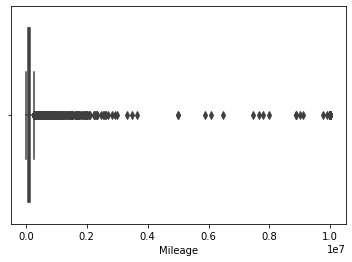

In [105]:
import seaborn as sns
sns.boxplot(x=used_cars_df['Mileage'])

In [106]:
Q1 = used_cars_df['Mileage'].quantile(0.25)
Q3 = used_cars_df['Mileage'].quantile(0.75)
IQR = Q3 - Q1
used_cars_df.loc[((used_cars_df.Mileage<=(Q1-1.5*IQR)) | (used_cars_df.Mileage>=(Q3+1.5*IQR))) , "Mileage"] =used_cars_df['Mileage'].mean()

<AxesSubplot:xlabel='Price'>

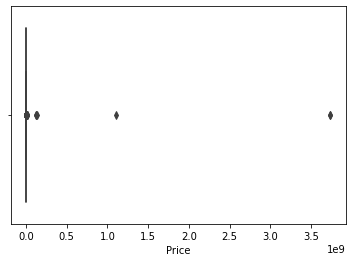

In [107]:
sns.boxplot(x=used_cars_df['Price'])

In [108]:
Q1 = used_cars_df['Price'].quantile(0.25)
Q3 = used_cars_df['Price'].quantile(0.75)
IQR = Q3 - Q1
used_cars_df.loc[((used_cars_df.Price<(Q1-1.5*IQR)) | (used_cars_df.Price>(Q3+1.5*IQR))) , 'Price'] =used_cars_df['Price'].mean()

In [109]:
used_cars_df.head()

,Name,Year,Manufacturer,State,Color,Fuel type,Transmission,Engine,Mileage,Price
0,AMG C 43 Base 4MATIC,2019.0,Mercedes-Benz,CA,Black,Gasoline,Automatic,6 Cylinders,24076.0,64770.327745
1,Terrain SLT,2018.0,Gmc,TN,Graphite Gray Metallic,Gasoline,Automatic,4 Cylinders,45278.0,26659.000000
2,Romeo Stelvio Ti,2018.0,Alfa,PA,Vulcano Black Metallic,Gasoline,Automatic,4 Cylinders,13690.0,34998.000000
3,Aviator Reserve AWD,2020.0,Lincoln,WI,Blue Diamond,Gasoline,Automatic,6 Cylinders,3104.0,64770.327745
4,XC60 T6 Momentum,2021.0,Volvo,WA,Fusion Red Metallic,Gasoline,Automatic,4 Cylinders,18378.0,46880.000000


In [110]:
used_cars_df = used_cars_df[used_cars_df.Engine != 'nan']

In [111]:
used_cars_df['Engine'].unique()

array(['6 Cylinders', '4 Cylinders', '8 Cylinders', '5 Cylinders',
       '10 Cylinders', '3 Cylinders', '12 Cylinders', 'Other'],
      dtype=object)

#  Data Analysis 

We will do EDA on the merged dataset to to help look at data before making any assumptions.

In [112]:
cols = used_cars_df.columns
num_cols = used_cars_df._get_numeric_data().columns
c=  list(set(cols) - set(num_cols))

In [113]:
print(used_cars_df[c].nunique())

Color            1451
Engine              8
Name            20713
Fuel type           6
State              52
Manufacturer       57
Transmission        4
dtype: int64


Dropping unncessary categorial columns

In [114]:
used_cars_df= used_cars_df.drop(columns=['Name','Color'])

**The top 4 popular states**

After looking at the number of unique variables for each categorial column, we decided to analyze the state in order to take the top 4 states as dummy variables

In [115]:
cars_per_state = used_cars_df.groupby(by=["State"]).size().sort_values(ascending=False).to_frame('size')
cars_per_state=cars_per_state.reset_index()

In [116]:
cars_per_state

,State,size
0,CA,20656
1,FL,12715
2,TX,10595
3,NY,8342
4,OH,7680
5,NC,7517
6,MI,6334
7,PA,6170
8,CO,5692
9,OR,5583


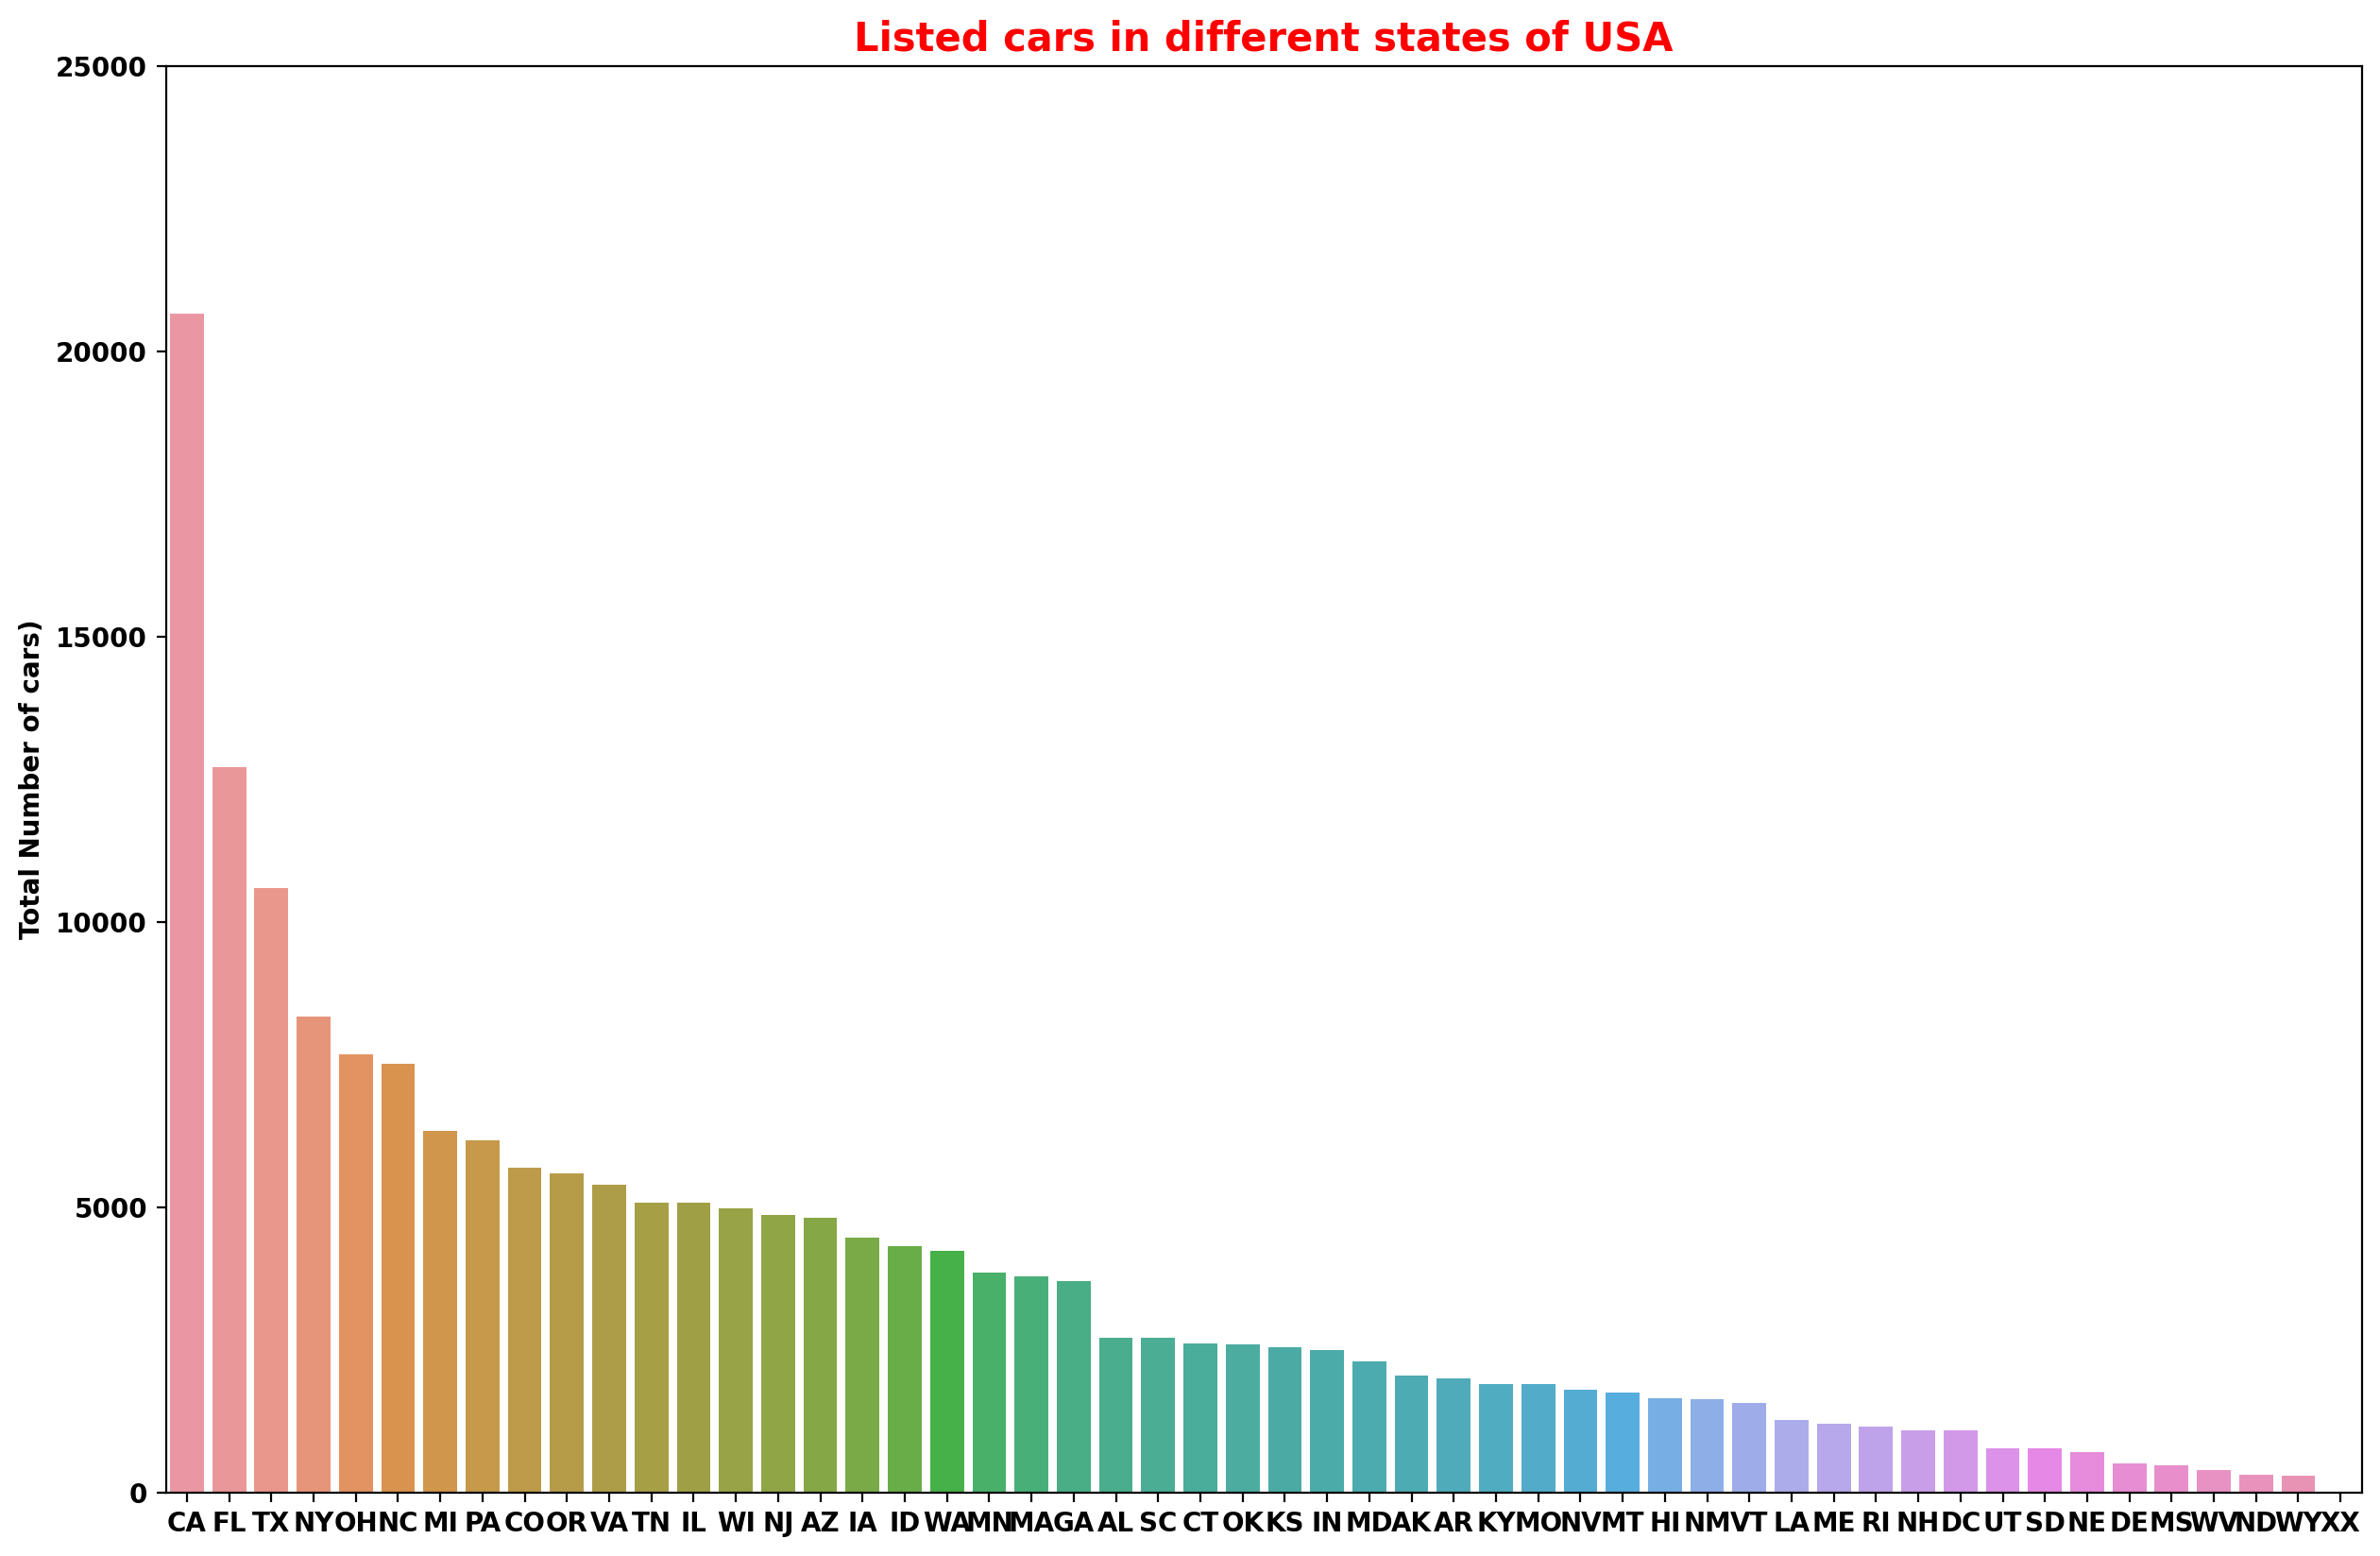

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = sns.barplot(x='State', y='size', data=cars_per_state)
plt.title("Listed cars in different states of USA", weight="bold", c="red", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Total Number of cars)",weight= "bold",c="k")
plt.ylim(0,25000)
plt.yticks(weight="bold")
plt.savefig('imgs/states.png', dpi=200)
plt.show()

after looking at the graph , we can take the top 4 states which are : **CA**, **FL**,**TX**, and **NY**

**Average Price per Manufacturer**

To explore the Manufacturer column, This graph help us to understand the average price for each Manufacturer

In [118]:
price_per_m= used_cars_df.groupby(by=["Manufacturer"])[['Price']].mean().reset_index()
price_per_m=price_per_m.sort_values(by='Price', ascending=False)
price_per_m=price_per_m.head(15)

In [119]:
price_per_m

,Manufacturer,Price
28,Lamborghini,64770.327745
46,Rolls-Royce,64770.327745
26,Karma,64770.327745
6,Bentley,56116.262196
4,Aston-Martin,55093.874723
14,Ferrari,54302.416377
33,Maserati,50619.216504
29,Land,49408.732295
53,Tesla,48793.096913
35,Mclaren,43135.163872


<Figure size 3000x2000 with 0 Axes>

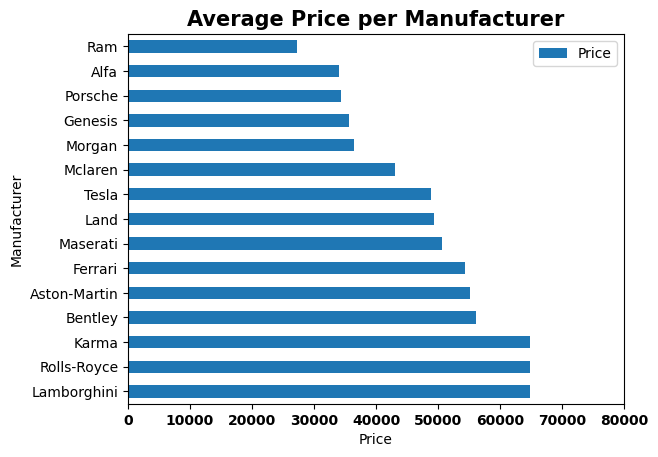

In [120]:
plt.figure(figsize=(15,10),dpi=200),
plt.style.use('default')
ax = price_per_m.plot.barh(x='Manufacturer', y='Price')
plt.title("Average Price per Manufacturer", weight="bold", c="black", fontsize=15)
plt.xlabel("Price",c="k")
plt.xticks(rotation=0, weight="bold")
plt.ylabel("Manufacturer",c="k")
plt.xlim(0,80000)
plt.savefig('imgs/Manufacturer_price.png', dpi=200)
plt.show()

**Processing Categorial Features**

In [121]:
cols = used_cars_df.columns
num_cols = used_cars_df._get_numeric_data().columns
c=  list(set(cols) - set(num_cols))
print("the remaining categorial features are: ")
print(c)

the remaining categorial features are: 
['Engine', 'Fuel type', 'State', 'Manufacturer', 'Transmission']


Obtain dummy features

In [122]:
used_cars_df.shape

(190002, 8)

In [123]:
used_cars_df_d= pd.get_dummies(used_cars_df, columns=['Manufacturer'], prefix='m', prefix_sep='.')

In [124]:
used_cars_df_d= pd.get_dummies(used_cars_df_d, columns=['Fuel type'], prefix='fuel', prefix_sep='.')

In [125]:
used_cars_df_d= pd.get_dummies(used_cars_df_d, columns=['Transmission'], prefix='t', prefix_sep='.')

In [126]:
used_cars_df_d= pd.get_dummies(used_cars_df_d, columns=['Engine'], prefix='eng', prefix_sep='.')

In [127]:
used_cars_df_d.columns

Index(['Year', 'State', 'Mileage', 'Price', 'm.Acura', 'm.Alfa',
       'm.Alfa-Romeo', 'm.Aston', 'm.Aston-Martin', 'm.Audi', 'm.Bentley',
       'm.Bmw', 'm.Buick', 'm.Cadillac', 'm.Chevrolet', 'm.Chrysler',
       'm.Datsun', 'm.Dodge', 'm.Ferrari', 'm.Fiat', 'm.Ford', 'm.Genesis',
       'm.Gmc', 'm.Harley-Davidson', 'm.Honda', 'm.Hummer', 'm.Hyundai',
       'm.Infiniti', 'm.Jaguar', 'm.Jeep', 'm.Karma', 'm.Kia', 'm.Lamborghini',
       'm.Land', 'm.Land Rover', 'm.Lexus', 'm.Lincoln', 'm.Maserati',
       'm.Mazda', 'm.Mclaren', 'm.Mercedes-Benz', 'm.Mercury', 'm.Mini',
       'm.Mitsubishi', 'm.Morgan', 'm.Nissan', 'm.Not specified', 'm.Pontiac',
       'm.Porsche', 'm.Ram', 'm.Rolls-Royce', 'm.Rover', 'm.Saab', 'm.Saturn',
       'm.Scion', 'm.Subaru', 'm.Suzuki', 'm.Tesla', 'm.Toyota',
       'm.Volkswagen', 'm.Volvo', 'fuel.Diesel', 'fuel.Electric',
       'fuel.Flexible', 'fuel.Gasoline', 'fuel.Hybrid', 'fuel.Other',
       't.Automatic', 't.CVT', 't.Manual', 't.nan', 'eng.1

In [128]:
popular_states= ['State.CA','State.FL','State.TX','State.NY']
used_cars_df_d= pd.get_dummies(used_cars_df_d, columns=['State'], prefix='State', prefix_sep='.')
droplist= [i for i in used_cars_df_d.columns if (i.startswith('State') and i not in popular_states)]
used_cars_df_d.drop(droplist,axis=1,inplace=True)

In [129]:
len(used_cars_df_d.columns)

82

**Analayzing Correlation**

In [130]:
used_cars_df_d.shape

(190002, 82)

rearange columns so the target feature at the beggining

In [131]:
columns= used_cars_df_d.columns
columns=list(columns)
columns.remove('Price')
columns.insert(0,'Price')
used_cars_df_d=used_cars_df_d[columns]

In [132]:
# View the correlations
used_cars_df_d.corr()

,Price,Year,Mileage,m.Acura,m.Alfa,m.Alfa-Romeo,m.Aston,m.Aston-Martin,m.Audi,m.Bentley,...,eng.3 Cylinders,eng.4 Cylinders,eng.5 Cylinders,eng.6 Cylinders,eng.8 Cylinders,eng.Other,State.CA,State.FL,State.NY,State.TX
Price,1.000000,0.308213,-0.494538,-0.010908,0.018275,0.012053,0.000985,0.020020,0.053372,0.013861,...,-0.011987,-0.232821,-0.055375,0.019755,0.230467,0.029220,0.001277,-0.008996,-0.019081,0.041068
Year,0.308213,1.000000,-0.235404,0.014874,0.013235,-0.000085,0.002610,-0.000152,0.044832,0.004334,...,0.012060,0.153429,-0.018877,0.037976,-0.199766,-0.003029,-0.028712,0.001877,-0.014863,0.033288
Mileage,-0.494538,-0.235404,1.000000,0.001435,-0.021002,-0.024061,-0.005262,-0.010133,-0.051942,-0.007715,...,-0.042885,-0.102342,0.040548,0.032953,0.076206,-0.031711,0.007269,-0.018452,-0.014112,-0.022649
m.Acura,-0.010908,0.014874,0.001435,1.000000,-0.001627,-0.002313,-0.000339,-0.000795,-0.013362,-0.000536,...,-0.005364,-0.018121,-0.006413,0.081888,-0.064259,-0.004963,0.006818,0.001537,0.000949,0.001877
m.Alfa,0.018275,0.013235,-0.021002,-0.001627,1.000000,-0.000344,-0.000050,-0.000118,-0.001989,-0.000080,...,-0.000799,0.019814,-0.001384,-0.010120,-0.009582,-0.000980,-0.005435,0.008017,-0.000032,0.000641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eng.Other,0.029220,-0.003029,-0.031711,-0.004963,-0.000980,-0.001394,-0.000204,0.010545,-0.004716,-0.000323,...,-0.003233,-0.046169,-0.005602,-0.046691,-0.038790,1.000000,0.005485,-0.004786,-0.006130,-0.006170
State.CA,0.001277,-0.028712,0.007269,0.006818,-0.005435,-0.000084,-0.001133,-0.000435,-0.004170,-0.001792,...,0.002891,0.036167,0.003048,-0.018704,-0.021204,0.005485,1.000000,-0.093531,-0.074841,-0.084872
State.FL,-0.008996,0.001877,-0.018452,0.001537,0.008017,-0.004974,0.012115,0.009035,-0.003077,0.006838,...,-0.003454,0.001803,-0.004005,-0.000594,-0.004374,-0.004786,-0.093531,1.000000,-0.057389,-0.065080
State.NY,-0.019081,-0.014863,-0.014112,0.000949,-0.000032,-0.002419,-0.000695,-0.001631,0.000187,-0.001099,...,0.001552,0.006570,0.005688,-0.003110,-0.004169,-0.006130,-0.074841,-0.057389,1.000000,-0.052076


In [133]:
# example of a better corr matrix
plt.figure(figsize=(100,100))
sns.heatmap(used_cars_df_d.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);
plt.savefig('imgs/heatmap.png', dpi=200)
plt.show()

In [134]:
used_cars_df_d.columns

Index(['Price', 'Year', 'Mileage', 'm.Acura', 'm.Alfa', 'm.Alfa-Romeo',
       'm.Aston', 'm.Aston-Martin', 'm.Audi', 'm.Bentley', 'm.Bmw', 'm.Buick',
       'm.Cadillac', 'm.Chevrolet', 'm.Chrysler', 'm.Datsun', 'm.Dodge',
       'm.Ferrari', 'm.Fiat', 'm.Ford', 'm.Genesis', 'm.Gmc',
       'm.Harley-Davidson', 'm.Honda', 'm.Hummer', 'm.Hyundai', 'm.Infiniti',
       'm.Jaguar', 'm.Jeep', 'm.Karma', 'm.Kia', 'm.Lamborghini', 'm.Land',
       'm.Land Rover', 'm.Lexus', 'm.Lincoln', 'm.Maserati', 'm.Mazda',
       'm.Mclaren', 'm.Mercedes-Benz', 'm.Mercury', 'm.Mini', 'm.Mitsubishi',
       'm.Morgan', 'm.Nissan', 'm.Not specified', 'm.Pontiac', 'm.Porsche',
       'm.Ram', 'm.Rolls-Royce', 'm.Rover', 'm.Saab', 'm.Saturn', 'm.Scion',
       'm.Subaru', 'm.Suzuki', 'm.Tesla', 'm.Toyota', 'm.Volkswagen',
       'm.Volvo', 'fuel.Diesel', 'fuel.Electric', 'fuel.Flexible',
       'fuel.Gasoline', 'fuel.Hybrid', 'fuel.Other', 't.Automatic', 't.CVT',
       't.Manual', 't.nan', 'eng.10 Cylinde

# Modeling : Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

In [160]:
X = used_cars_df_d.drop('Price', axis=1)
y = used_cars_df_d['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

regressor=LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [161]:
y_pred = regressor.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error 'MAE' of the model is: ", mae)

The Mean Absolute Error 'MAE' of the model is:  6995.841512657899


In [162]:
r2= r2_score(y_test, y_pred)
print("The R-squared 'R^2' of the model is: ", r2)

The R-squared 'R^2' of the model is:  0.5180177192785644


In [163]:
X_train.columns

Index(['Year', 'Mileage', 'm.Acura', 'm.Alfa', 'm.Alfa-Romeo', 'm.Aston',
       'm.Aston-Martin', 'm.Audi', 'm.Bentley', 'm.Bmw', 'm.Buick',
       'm.Cadillac', 'm.Chevrolet', 'm.Chrysler', 'm.Datsun', 'm.Dodge',
       'm.Ferrari', 'm.Fiat', 'm.Ford', 'm.Genesis', 'm.Gmc',
       'm.Harley-Davidson', 'm.Honda', 'm.Hummer', 'm.Hyundai', 'm.Infiniti',
       'm.Jaguar', 'm.Jeep', 'm.Karma', 'm.Kia', 'm.Lamborghini', 'm.Land',
       'm.Land Rover', 'm.Lexus', 'm.Lincoln', 'm.Maserati', 'm.Mazda',
       'm.Mclaren', 'm.Mercedes-Benz', 'm.Mercury', 'm.Mini', 'm.Mitsubishi',
       'm.Morgan', 'm.Nissan', 'm.Not specified', 'm.Pontiac', 'm.Porsche',
       'm.Ram', 'm.Rolls-Royce', 'm.Rover', 'm.Saab', 'm.Saturn', 'm.Scion',
       'm.Subaru', 'm.Suzuki', 'm.Tesla', 'm.Toyota', 'm.Volkswagen',
       'm.Volvo', 'fuel.Diesel', 'fuel.Electric', 'fuel.Flexible',
       'fuel.Gasoline', 'fuel.Hybrid', 'fuel.Other', 't.Automatic', 't.CVT',
       't.Manual', 't.nan', 'eng.10 Cylinders', 'eng

#  Experiments: Model Improvement

we will try the lasso model to improve prediction results, first we will scale the data

In [164]:
from sklearn.preprocessing import StandardScaler

X_scaled = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [165]:
from sklearn.linear_model import LassoCV
alphas = np.linspace(0.001, 10,100)
lasso_cv = LassoCV(alphas=alphas)
lasso_cv.fit(X_train, y_train)
print("The best Alpha for Lasso is: ",lasso_cv.alpha_)

The best Alpha for Lasso is:  2.93


In [166]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=lasso_cv.alpha_)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error 'MAE' of the Lasso model is: ", mae)

The Mean Absolute Error 'MAE' of the Lasso model is:  6949.7399950439685


In [167]:
from sklearn.linear_model import RidgeCV
alphas = np.linspace(0.001, 10,100)
ridge_cv = RidgeCV(alphas=alphas)
ridge_cv.fit(X_train, y_train)
print("The best Alpha for Ridge is: ",ridge_cv.alpha_)

The best Alpha for Ridge is:  10.0


In [168]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=ridge_cv.alpha_)
ridge.fit(X_train, y_train)
y_pred = ridge.predict(X_test)
mae= mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error 'MAE' of the Ridge model is: ", mae)

The Mean Absolute Error 'MAE' of the Ridge model is:  6950.296952629792


For cross validation we will do the following: 

In [169]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regressor2 = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state = 5)

scores_cv=cross_val_score(regressor2, X_train, y_train,cv=kf,scoring='r2')
print("The Average score for cross validation Linear Regression is: ",np.mean(scores_cv))

The Average score for cross validation Linear Regression is:  0.5118144347381594


In [170]:
regressor2.fit(X_train, y_train)
y_pred = regressor2.predict(X_test)
mae=mean_absolute_error(y_test, y_pred)
print("The Mean Absolute Error 'MAE' of the model is: ", mae)

The Mean Absolute Error 'MAE' of the model is:  6901.956374625906


In [171]:
r2= r2_score(y_test, y_pred)
print("The R-squared 'R^2' of the model is: ", r2)

The R-squared 'R^2' of the model is:  0.5146522283705928


# Web app

creating a simple user interactive web applicatio that allow users to enter their car details and show predicted price

In [172]:
import pickle
pickle_out=open('regressor.pkl','wb')
pickle.dump(regressor2,pickle_out)
pickle_out.close()

used_car_price.py: is a python file that contains code of the application

![image info](./webapp2.png)